# all imports 

In [1]:
from google.colab import drive
import os

import pandas as pd
import numpy as np

from statistics import mean

# for plotting
import matplotlib.pyplot as plt

# from statistical hypothesis testing section
import scipy.stats as stats
from scipy.stats import chi2

import math
from scipy.stats import norm

# from handling missing value section 
from sklearn.impute import KNNImputer

import seaborn as sns
from sklearn.utils import resample

# from encoding section
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import re

from sklearn.preprocessing import StandardScaler

# from applying machine learning model section
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# from t-test section
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import sqrt

# drive set up

methods

In [2]:
# create and set working directory
def create_and_set_working_directory(project_folder):
	if os.path.isdir(root_directory + project_folder) == False:
		os.mkdir(root_directory + project_folder)
		print(root_directory + project_folder + "didn't exist and so created")
	
	# changing the OS path to project folder as working directory
	os.chdir(root_directory + project_folder)

code flow

In [3]:
drive.mount('/content/drive', force_remount= True)

root_directory = "/content/drive/My Drive/"
project_folder = "Colab Notebooks/ADHD Project Final/"
 
create_and_set_working_directory(project_folder)

Mounted at /content/drive


# (skip) main dataset load (sas7bdat)

imports

In [4]:
!pip install sas7bdat
from sas7bdat import SAS7BDAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-py3-none-any.whl size=16309 sha256=b4cb39a0304ea35b0151ec9871798e21c99a2f98ed0fe86383bf06e4a5ae1753
  Stored in directory: /root/.cache/pip/wheels/d2/ad/aa/badcd17bd07e0df1adfc85e738acc942787648fb7ed4044543
Successfully built sas7bdat


code flow

In [5]:
with SAS7BDAT('/content/drive/MyDrive/Colab Notebooks/ADHD Project Final/nsch_2019_topical.sas7bdat', skip_header=False) as reader:
    dataframe_raw = reader.to_data_frame()

[nsch_2019_topical.sas7bdat] header length 131072 != 8192


In [6]:
dataframe_raw.to_csv('dataframe_raw.csv', index=False)
!cp dataframe_raw.csv root_directory + project_folder

cp: target 'project_folder' is not a directory


# dataset processing p1

column selection & rename

In [7]:
dataframe_v1 = pd.read_csv('dataframe_raw.csv')
dataframe_v1.shape

(29433, 443)

In [8]:
dataframe_v1 = dataframe_v1[['SC_AGE_YEARS', 'MOMAGE', 'SC_SEX', 'ALLERGIES', 'ARTHRITIS', 'K2Q40A', 'K2Q46A', 'HEADACHE', 'K2Q33A', 'K2Q32A', 'CURRCOV', 'ACE9', 'SC_RACER', 'FAMILY_R', 'A1_SEX', 'A2_SEX', 'A1_RELATION', 'A2_RELATION', 'A1_GRADE', 'A2_GRADE', 'HIGRADE', 'BIRTHWT_VL', 'BIRTHWT_L', 'K2Q05', 'FPL_IF', 'FPL_I1', 'FPL_I2', 'FPL_I3', 'FPL_I4', 'FPL_I5', 'FPL_I6', 'K2Q31A']]


In [9]:
dataframe_v1 = dataframe_v1.rename(
    columns={"SC_AGE_YEARS": "Child's Age (yr)", "MOMAGE": "Mother's Age at Child Birth (yr)", "SC_SEX": "Child's Sex", "ALLERGIES": "Allergies", "ARTHRITIS": "Arthritis", "K2Q40A": "Asthma", "K2Q46A": "Brain Injury", "HEADACHE": "Headaches", "K2Q33A": "Anxiety", "K2Q32A": "Depression", "CURRCOV": "Health Insurance Coverage", "ACE9": "Lived with Anyone with Alcohol/Drug Problem", "SC_RACER": "Child's Race", "FAMILY_R": "Family Structure", "BIRTHWT_VL": "Very Low Birth Weight", "BIRTHWT_L": "Low Birth Weight", "K2Q05": "Premature Birth", "K2Q31A": "ADD/ADHD"}, 
)

In [10]:
dataframe_v1

,Child's Age (yr),Mother's Age at Child Birth (yr),Child's Sex,Allergies,Arthritis,Asthma,Brain Injury,Headaches,Anxiety,Depression,...,Low Birth Weight,Premature Birth,FPL_IF,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,ADD/ADHD
0,1.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2.0
1,15.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2.0
2,6.0,29.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,187.0,99.0,201.0,50.0,400.0,191.0,2.0
3,10.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2.0
4,0.0,32.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.0,133.0,133.0,133.0,133.0,133.0,133.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29428,8.0,39.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2.0
29429,5.0,32.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.0,334.0,334.0,334.0,334.0,334.0,334.0,2.0
29430,13.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2.0
29431,16.0,42.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,0.0,396.0,396.0,396.0,396.0,396.0,396.0,1.0


# dataset processing p2

mother's education & poverty level feature creation

methods

In [11]:
def convert_grades(adult, x):
  res = np.nan
  # 1 = 8th grade or less
  # 2 = 9th-12th grade; No diploma
  # 3 = High School Graduate or GED Completed
  # 4 = Completed a vocational, trade, or business school program
  # 5 = Some College Credit, but No Degree
  # 6 = Associate Degree (AA, AS)
  # 7 = Bachelor's Degree (BA, BS, AB)
  # 8 = Master's Degree (MA, MS, MSW, MBA)
  # 9 = Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, JD)

  if adult == "A1":
    if dataframe_v1.loc[x, "A1_GRADE"] == 1 or dataframe_v1.loc[x, "A1_GRADE"]  == 2:
      res = 1
    elif dataframe_v1.loc[x, "A1_GRADE"] == 3 or dataframe_v1.loc[x, "A1_GRADE"]  == 4:
      res = 2
    else:
      res = 3
  else:
    if dataframe_v1.loc[x, "A2_GRADE"] == 1 or dataframe_v1.loc[x, "A2_GRADE"]  == 2:
      res = 1
    elif dataframe_v1.loc[x, "A2_GRADE"] == 3 or dataframe_v1.loc[x, "A2_GRADE"]  == 4:
      res = 2
    else:
      res = 3
  
  return res

In [12]:
def check_if_parent(adult, x):
  # 1 = Biological or Adoptive Parent
  # 2 = Step-parent
  # 4 = Foster Parent

  if adult == "A1":
    if dataframe_v1.loc[x, "A1_RELATION"] == 1 or dataframe_v1.loc[x, "A1_RELATION"] == 2 or dataframe_v1.loc[x, "A1_RELATION"] == 4:
      return True;
  else:
    if dataframe_v1.loc[x, "A2_RELATION"] == 1 or dataframe_v1.loc[x, "A2_RELATION"] == 2 or dataframe_v1.loc[x, "A2_RELATION"] == 4:
      return True
  
  return False

In [13]:
def get_mother_education_value(y):
  mother_education = np.nan

  female_adult = "none"

  
  if (dataframe_v1.loc[y, "A1_SEX"] == 2.0) and (dataframe_v1.loc[y, "A2_SEX"] == 2.0):
    female_adult = "both"
  elif dataframe_v1.loc[y, "A1_SEX"] == 2.0:
    female_adult = "A1"
  elif dataframe_v1.loc[y, "A2_SEX"] == 2.0:
    female_adult = "A2"

  if female_adult == "both":
    A1_is_parent = False;
    A2_is_parent = False;
    
    A1_is_parent = check_if_parent("A1", y)
    A2_is_parent = check_if_parent("A2", y); 

    if (A1_is_parent == True) and (A2_is_parent == True):
      mother_education = dataframe_v1.loc[y, "HIGRADE"]
      
    elif A1_is_parent == True:
      mother_eduction = convert_grades("A1", y)    
        
    elif A2_is_parent == True:
      mother_eduction = convert_grades("A2", y)
     
  elif female_adult == "A1" or female_adult == "A2":
    if check_if_parent("A1", y) == True:       
      mother_education = convert_grades("A1", y)
    else:
      if check_if_parent("A2", y) == True:  
        mother_education = convert_grades("A2", y)

  return mother_education

In [14]:
def get_poverty_level_value(y):
  poverty_level = np.nan

  if dataframe_v1.loc[y, "FPL_IF"] == 0:
    poverty_level = dataframe_v1.loc[y, "FPL_I1"]
  else:
    poverty_level = multiple_impute_estimate

  # binarization of poverty level
  # 1. <200% | 2 >= 200%
  if poverty_level < 200:
    poverty_level = 1
  else:
    poverty_level = 2  

  return poverty_level  

code flow

In [15]:
# Federal Poverty Level

dataframe_v1["Mother's Education"] = np.nan
dataframe_v1["Poverty Level"] = np.nan

In [16]:
# performing multiple imputation estimate

multiple_impute_estimate = np.nan
total_imputed_instances = 0
number_of_imputed_dataset = 6
q_list = [0, 0, 0, 0, 0, 0]

for i in range(len(dataframe_v1)):
  if dataframe_v1.loc[i, "FPL_IF"] == 1:
    total_imputed_instances = total_imputed_instances + 1

    for j in range(len(q_list)):
      q_list[j] = q_list[j] + dataframe_v1.loc[i, "FPL_I" + str(j + 1)]

print("total imputed values ")
print(q_list)
print("")
print("total number of imputed instances ", total_imputed_instances)
print("")

for k in range(len(q_list)):
  q_list[k] = round(q_list[k] / total_imputed_instances, 6)

multiple_impute_estimate = round(mean(q_list), 6)

print("total imputed mean values ")
print(q_list)
print("")
print("final multiple imputation estimate ", multiple_impute_estimate)


total imputed values 
[1254345.0, 1229685.0, 1240669.0, 1240727.0, 1223324.0, 1230240.0]

total number of imputed instances  5181

total imputed mean values 
[242.104806, 237.345107, 239.465161, 239.476356, 236.117352, 237.452229]

final multiple imputation estimate  238.660168


In [17]:
for i in range(len(dataframe_v1)):
  mother_education = get_mother_education_value(i)
  poverty_level = get_poverty_level_value(i)

  dataframe_v1.loc[i, "Mother's Education"] = mother_education
  dataframe_v1.loc[i, "Poverty Level"] = poverty_level
  

In [18]:
# removing unnecessary columns
dataframe_v1.drop(['A1_SEX', 'A2_SEX', 'A1_RELATION', 'A2_RELATION', 'A1_GRADE', 'A2_GRADE', 'HIGRADE'], axis=1, inplace=True)
dataframe_v1.drop(['FPL_IF', 'FPL_I1', 'FPL_I2', 'FPL_I3', 'FPL_I4', 'FPL_I5', 'FPL_I6'], axis=1, inplace=True)


In [19]:
dataframe_v1["Mother's Education"].value_counts(dropna=False)

3.0    21250
2.0     3776
NaN     3613
1.0      794
Name: Mother's Education, dtype: int64

In [20]:
dataframe_v1["Poverty Level"].value_counts(dropna=False)

2.0    23567
1.0     5866
Name: Poverty Level, dtype: int64

In [21]:
# moving the class column to the end
class_column = dataframe_v1.pop("ADD/ADHD")
dataframe_v1.insert(len(dataframe_v1.columns), 'ADD/ADHD', class_column)


In [22]:
dataframe_v1

,Child's Age (yr),Mother's Age at Child Birth (yr),Child's Sex,Allergies,Arthritis,Asthma,Brain Injury,Headaches,Anxiety,Depression,Health Insurance Coverage,Lived with Anyone with Alcohol/Drug Problem,Child's Race,Family Structure,Very Low Birth Weight,Low Birth Weight,Premature Birth,Mother's Education,Poverty Level,ADD/ADHD
0,1.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,2.0,3.0,2.0,2.0
1,15.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
2,6.0,29.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
3,10.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
4,0.0,32.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29428,8.0,39.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
29429,5.0,32.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
29430,13.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,6.0,2.0,2.0,2.0,NaN,2.0,2.0
29431,16.0,42.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0


In [23]:
dataframe_v1.to_csv('dataframe_v1.csv', index=False)
!cp dataframe_v1.csv root_directory + project_folder

cp: target 'project_folder' is not a directory


# performing descriptive analysis

In [24]:
dataframe_v2_for_DA = pd.read_csv('dataframe_v1.csv')

methods

In [25]:
def draw_hist(df, variable, f_size):
    fig, ax = plt.subplots(figsize=(f_size[0], f_size[1]))
    sns.histplot(data=df, x=variable, hue="ADD/ADHD", kde=True, ax=ax)


In [26]:
def draw_count_multiple(df, seq):

  if seq == 1:
    fig, axes = plt.subplots(3, 3, sharey=True, figsize=(18,11))
    sns.countplot(x="Child's Sex", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[0][0])
    sns.countplot(x="Allergies", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[0][1])
    sns.countplot(x="Arthritis", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[0][2])
    sns.countplot(x="Asthma", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[1][0])
    sns.countplot(x="Brain Injury", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[1][1])
    sns.countplot(x="Headaches", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[1][2])
    sns.countplot(x="Anxiety", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[2][0])
    sns.countplot(x="Depression", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[2][1])
    sns.countplot(x="Health Insurance Coverage", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[2][2])
  elif seq == 2:
    fig, axes = plt.subplots(3, 2, sharey=True, figsize=(18,11))
    sns.countplot(x="Lived with Anyone with Alcohol/Drug Problem", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[0][0])
    sns.countplot(x="Child's Race", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[0][1])
    sns.countplot(x="Very Low Birth Weight", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[1][0])
    sns.countplot(x="Low Birth Weight", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[1][1])
    sns.countplot(x="Premature Birth", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[2][0])
    sns.countplot(x="Poverty Level", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[2][1])  
  else:
    fig, axes = plt.subplots(2, 1, sharey=True, figsize=(18,11))
    sns.countplot(x="Family Structure", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[0])
    sns.countplot(x="Mother's Education", data=df, palette="husl", hue="ADD/ADHD", hue_order=["no", "yes"], ax=axes[1])
  

code flow

In [27]:
# changing discrete attribute values to categorical values (original)
dataframe_v2_for_DA["Child's Sex"].replace([1.0, 2.0], ["male", "female"], inplace=True)
dataframe_v2_for_DA["Allergies"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Arthritis"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Asthma"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Brain Injury"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Headaches"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Anxiety"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Depression"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Health Insurance Coverage"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Lived with Anyone with Alcohol/Drug Problem"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Child's Race"].replace([1.0, 2.0, 3.0], ["white", "black", "others"], inplace=True)

dataframe_v2_for_DA["Family Structure"].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], 
                                     ["Two biogical/adoptive parents, currently married", 
                                      "Two biogical/adoptive parents, not currently married", 
                                      "Two parents (at least one not biological/adoptive), currently married", 
                                      "Two parents (at least one not biological/adoptive), not currently married",
                                      "Single mother",
                                      "Single father",
                                      "Grandparent household",
                                      "Other relation"], 
                                     inplace=True)

dataframe_v2_for_DA["Mother's Education"].replace([1.0, 2.0, 3.0], ["less than high school", "high school", "more than high school"], inplace=True)
dataframe_v2_for_DA["Very Low Birth Weight"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Low Birth Weight"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Premature Birth"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v2_for_DA["Poverty Level"].replace([1.0, 2.0], ["<200%", ">=200%"], inplace=True) 

In [28]:
# for target column
dataframe_v2_for_DA["ADD/ADHD"].replace([1.0, 2.0], ["yes", "no"], inplace=True)

In [29]:
dataframe_v2_for_DA.shape

(29433, 20)

In [30]:
dataframe_v2_for_DA.head(5)

,Child's Age (yr),Mother's Age at Child Birth (yr),Child's Sex,Allergies,Arthritis,Asthma,Brain Injury,Headaches,Anxiety,Depression,Health Insurance Coverage,Lived with Anyone with Alcohol/Drug Problem,Child's Race,Family Structure,Very Low Birth Weight,Low Birth Weight,Premature Birth,Mother's Education,Poverty Level,ADD/ADHD
0,1.0,27.0,female,no,no,no,no,no,no,no,yes,no,white,"Two biogical/adoptive parents, currently married",NaN,NaN,no,more than high school,>=200%,no
1,15.0,30.0,male,no,no,no,no,no,no,no,yes,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
2,6.0,29.0,female,yes,no,no,no,no,no,no,yes,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
3,10.0,30.0,male,no,no,no,no,no,no,no,yes,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
4,0.0,32.0,female,no,no,no,no,no,no,no,yes,no,others,"Two biogical/adoptive parents, currently married",no,no,no,NaN,<200%,no


In [31]:
# for columns with discrete values
dataframe_v2_for_DA.describe()

,Child's Age (yr),Mother's Age at Child Birth (yr)
count,29433.000000,28770.000000
mean,9.524038,30.142127
std,5.163991,5.813453
min,0.000000,18.000000
25%,5.000000,26.000000
50%,10.000000,30.000000
75%,14.000000,34.000000
max,17.000000,45.000000


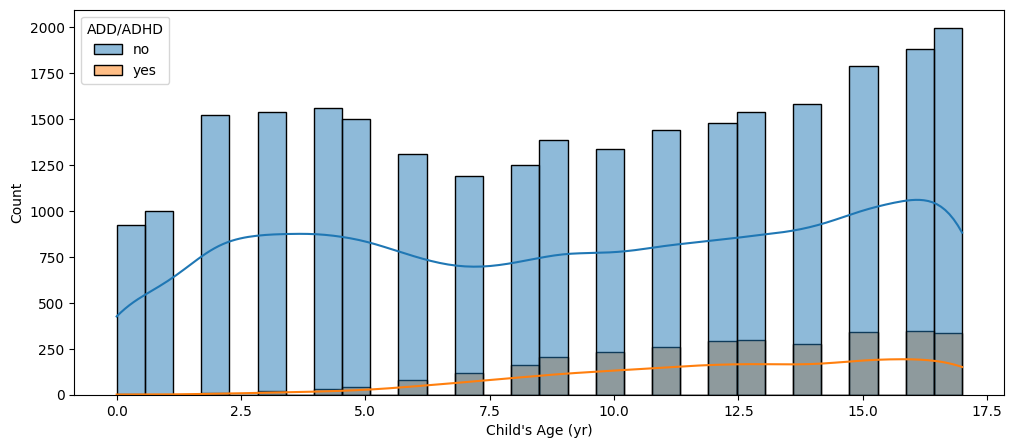

In [32]:
# histogram with hue for discrete valued attributes
draw_hist(dataframe_v2_for_DA, "Child's Age (yr)", [12, 5])

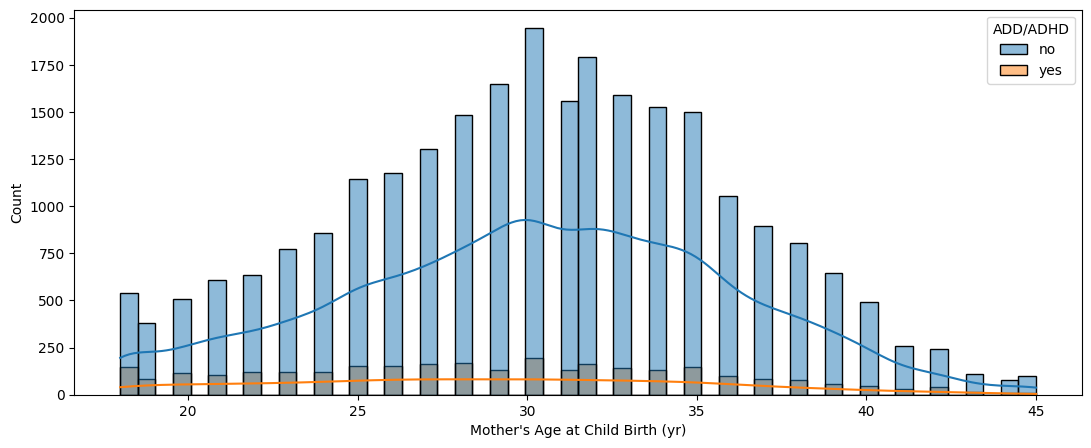

In [33]:
draw_hist(dataframe_v2_for_DA, "Mother's Age at Child Birth (yr)", [13, 5])

In [34]:
# for columns with categorical values
dataframe_v2_for_DA.describe(include=['object'])

,Child's Sex,Allergies,Arthritis,Asthma,Brain Injury,Headaches,Anxiety,Depression,Health Insurance Coverage,Lived with Anyone with Alcohol/Drug Problem,Child's Race,Family Structure,Very Low Birth Weight,Low Birth Weight,Premature Birth,Mother's Education,Poverty Level,ADD/ADHD
count,29433,29357,29144,29174,29321,29358,29347,29354,29302,28415,29433,28806,28167,28167,28839,25820,29433,29246
unique,2,2,2,2,2,2,2,2,2,2,3,8,2,2,2,3,2,2
top,male,no,no,no,no,no,no,no,yes,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
freq,15323,21140,29039,25609,27971,27987,25894,27751,28102,25666,23153,19115,27820,25795,25716,21250,23567,26197


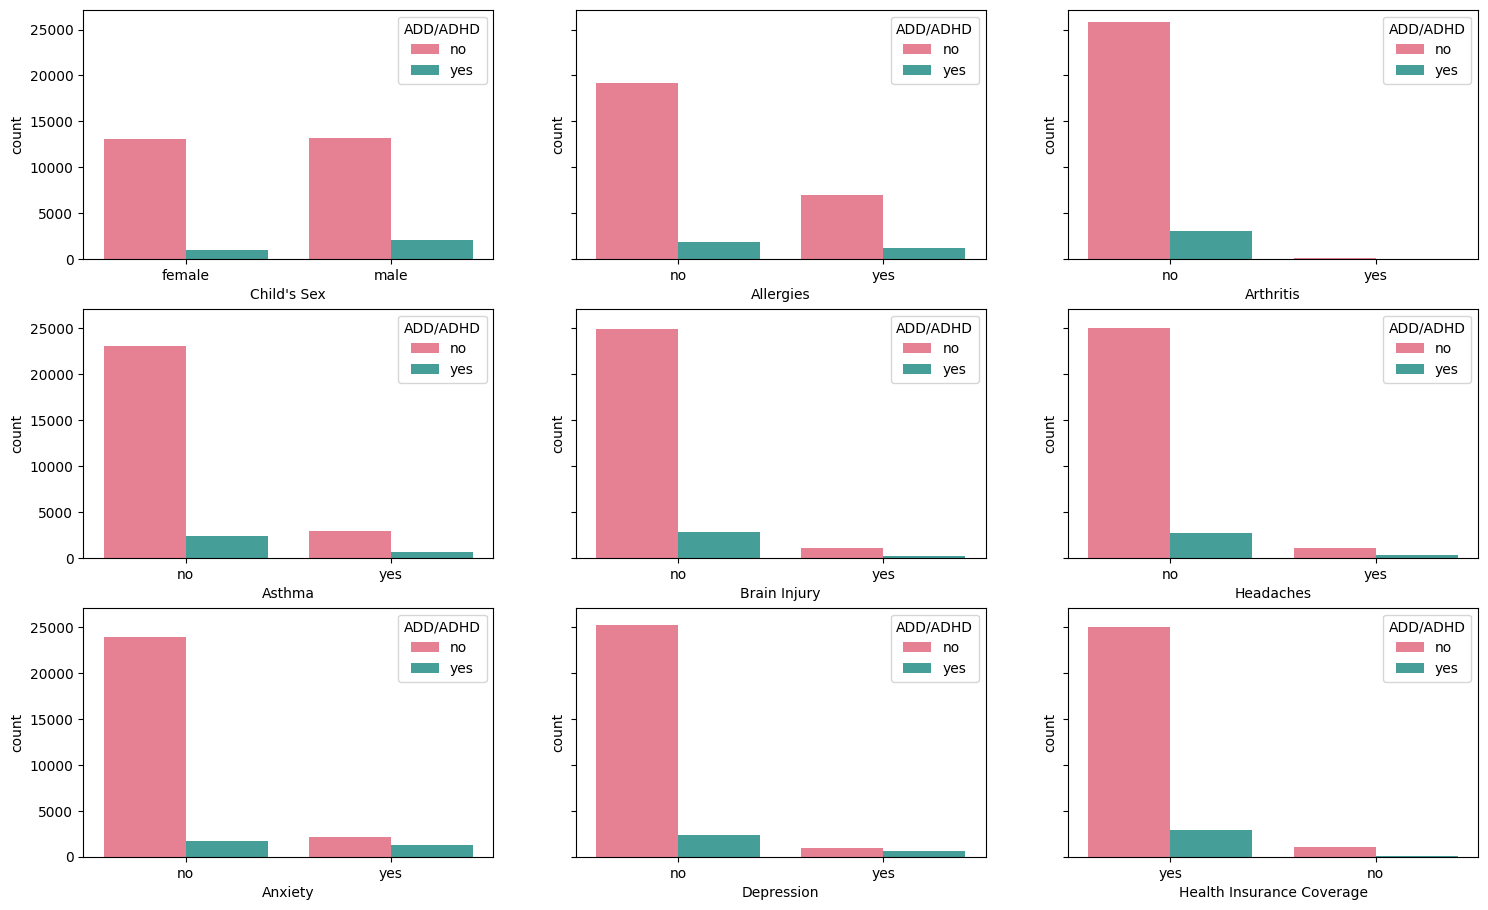

In [35]:
# countplot with hue for categorical valued attributes
draw_count_multiple(dataframe_v2_for_DA, 1)

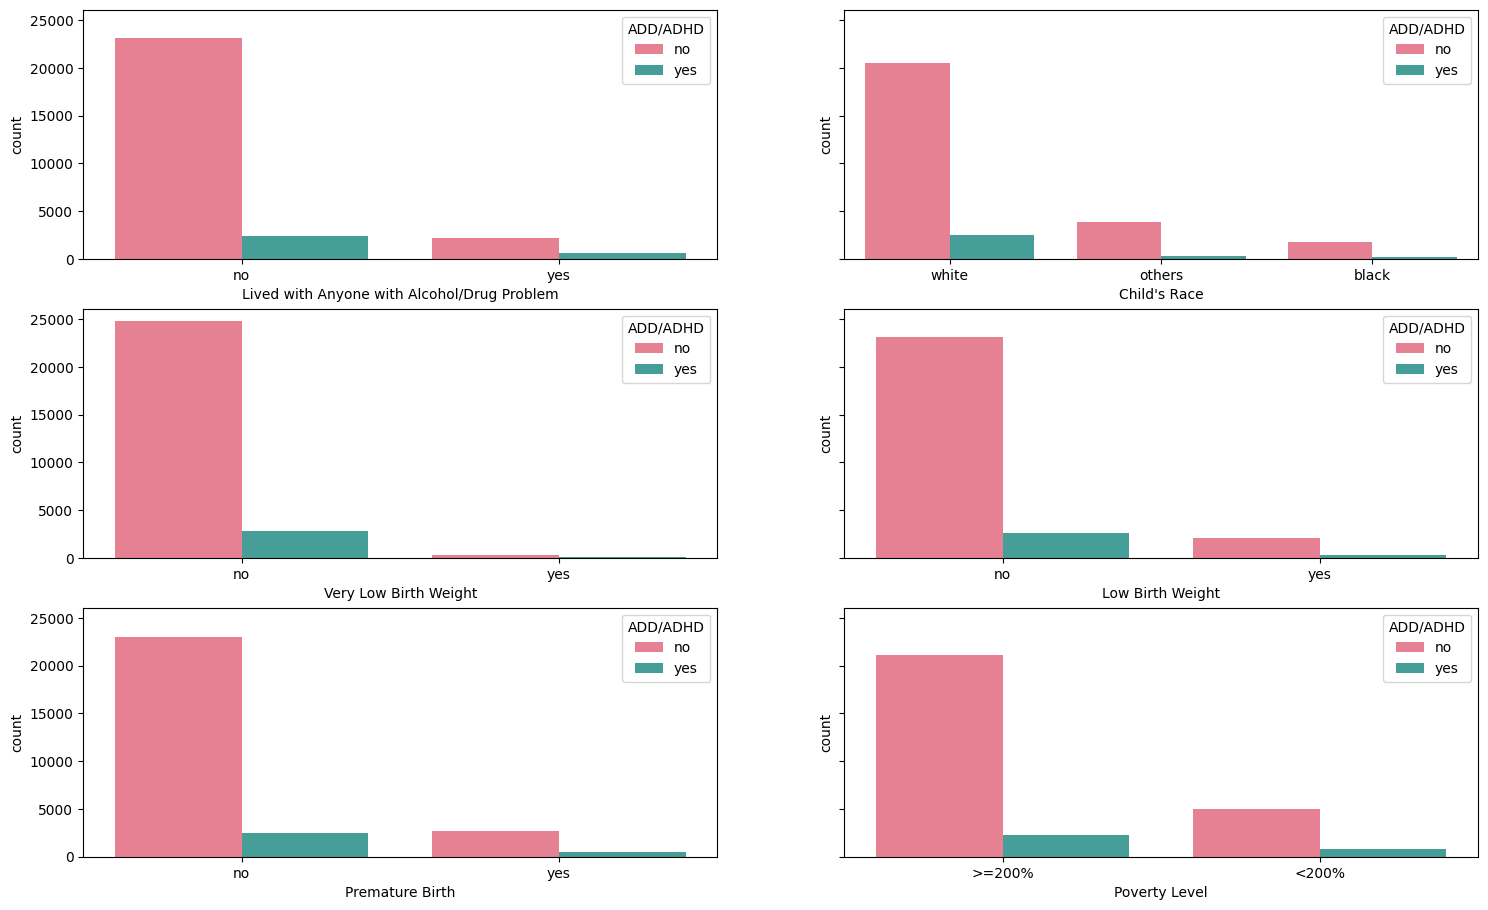

In [36]:
draw_count_multiple(dataframe_v2_for_DA, 2)

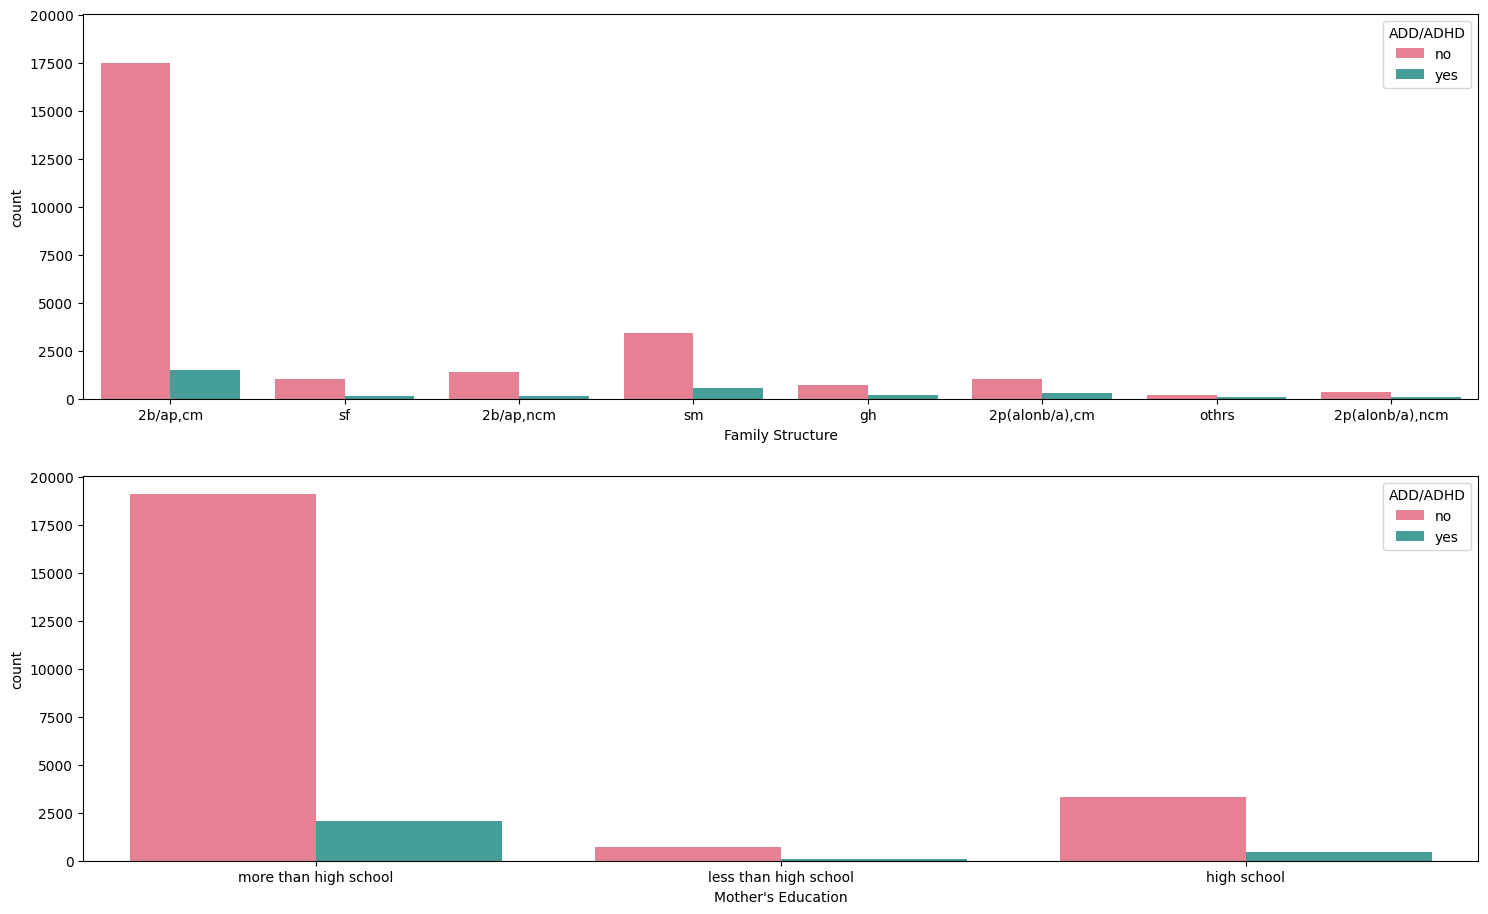

In [37]:
df_temp = dataframe_v2_for_DA.copy()
# converting big names of family structure variable to small names temporarily for the ease of visual representation
df_temp["Family Structure"] = dataframe_v2_for_DA["Family Structure"].replace( 
                                     ["Two biogical/adoptive parents, currently married", 
                                      "Two biogical/adoptive parents, not currently married", 
                                      "Two parents (at least one not biological/adoptive), currently married", 
                                      "Two parents (at least one not biological/adoptive), not currently married",
                                      "Single mother",
                                      "Single father",
                                      "Grandparent household",
                                      "Other relation"], 
                                      ["2b/ap,cm", "2b/ap,ncm", "2p(alonb/a),cm", "2p(alonb/a),ncm", "sm", "sf", "gh", "othrs"])
draw_count_multiple(df_temp, 0)

In [38]:
dataframe_v2_for_DA.to_csv('dataframe_v2_for_DA.csv', index=False)
!cp dataframe_v2_for_DA.csv root_directory + project_folder

cp: target 'project_folder' is not a directory


# feature selection/evaluation (statistical hypothesis testing)

chi square test for categorical features

In [134]:
dataframe_v3 = pd.read_csv('dataframe_v2_for_DA.csv')

methods

In [135]:
def perform_chi_square_test(feature_variable):
  # dropna() removing nan values from a specific column before passing
  dataset_table = pd.crosstab(dataframe_v3.dropna(subset=["ADD/ADHD"])["ADD/ADHD"], dataframe_v3.dropna(subset=[feature_variable])[feature_variable])
  observed_values = dataset_table.values

  # getting calculated values
  values = stats.chi2_contingency(dataset_table)
  # array containing the expected values at position 3
  expected_values = values[3]
  # getting degrees of freedom
  number_of_rows = len(dataset_table.iloc[0:, 0])
  number_of_columns = len(dataset_table.iloc[0, 0:])

  degrees_of_freedom = (number_of_rows - 1) * (number_of_columns - 1) 

  # getting chi square value
  chi_square = sum([(o-e)**2.0 / e for o, e in zip(observed_values, expected_values)])
  # chi_square is a list
  # number of elements equals number of columns in dataset_table (cross table)
  # each element is the column wise total in the dataset_table (cross table)
  chi_square_statistics = sum(chi_square)

  # finding critical value (left tailed)
  # returns alpha
  # critical_value = chi2.ppf(q=1-alpha, df=degrees_of_freedom)

  # finding critical value (right tailed)
  # returns 1 - alpha 
  # critical_value = chi2.ppf(q=alpha, df=degrees_of_freedom)

  # finding critical value (two tailed)
  # returns 1 - (alpha/2)
  critical_value_min = chi2.ppf(q=(alpha / 2), df=degrees_of_freedom)
  # returns (alpha/2)
  critical_value_max = chi2.ppf(q=1-(alpha / 2), df=degrees_of_freedom)

  # print(critical_value_max, chi_square_statistics, critical_value_min, degrees_of_freedom, number_of_rows, number_of_columns)

  # making decision
  """
  if (critical_value <= chi_square_statistics):
    print("ADD/ADHD and ", feature_variable, ": significant relation exists")
  else:
    print("***ADD/ADHD and ", feature_variable, ": no significant relation")
  """

  if (critical_value_max <= chi_square_statistics or critical_value_min >= chi_square_statistics):
    print("ADD/ADHD and ", feature_variable, ": significant relation exists")
  else:
    print("***ADD/ADHD and ", feature_variable, ": no significant relation")


code flow

In [136]:
# alpha or significance value
alpha = 0.05 

In [137]:
# performing chi square test for categorical columns
perform_chi_square_test("Child's Sex")
perform_chi_square_test("Allergies")
perform_chi_square_test("Arthritis")
perform_chi_square_test("Asthma")
perform_chi_square_test("Brain Injury")
perform_chi_square_test("Headaches")
perform_chi_square_test("Anxiety")
perform_chi_square_test("Depression")
perform_chi_square_test("Health Insurance Coverage")
perform_chi_square_test("Lived with Anyone with Alcohol/Drug Problem")
perform_chi_square_test("Child's Race")
perform_chi_square_test("Family Structure")
perform_chi_square_test("Mother's Education")
perform_chi_square_test("Very Low Birth Weight")
perform_chi_square_test("Low Birth Weight")
perform_chi_square_test("Premature Birth")
perform_chi_square_test("Poverty Level")

ADD/ADHD and  Child's Sex : significant relation exists
ADD/ADHD and  Allergies : significant relation exists
ADD/ADHD and  Arthritis : significant relation exists
ADD/ADHD and  Asthma : significant relation exists
ADD/ADHD and  Brain Injury : significant relation exists
ADD/ADHD and  Headaches : significant relation exists
ADD/ADHD and  Anxiety : significant relation exists
ADD/ADHD and  Depression : significant relation exists
***ADD/ADHD and  Health Insurance Coverage : no significant relation
ADD/ADHD and  Lived with Anyone with Alcohol/Drug Problem : significant relation exists
ADD/ADHD and  Child's Race : significant relation exists
ADD/ADHD and  Family Structure : significant relation exists
ADD/ADHD and  Mother's Education : significant relation exists
ADD/ADHD and  Very Low Birth Weight : significant relation exists
ADD/ADHD and  Low Birth Weight : significant relation exists
ADD/ADHD and  Premature Birth : significant relation exists
ADD/ADHD and  Poverty Level : significant 

In [138]:
# dropping the health insurance coverage column as it is not important
dataframe_v3 = dataframe_v3.drop("Health Insurance Coverage", axis=1)

t test for discrete features

methods

In [139]:
def perform_t_test(feature_variable):
  sample_1 = dataframe_v3.loc[dataframe_v3["ADD/ADHD"]=="yes", feature_variable]
  sample_2 = dataframe_v3.loc[dataframe_v3["ADD/ADHD"]=="no", feature_variable]

  positive_var = sample_1.var()
  negative_var = sample_2.var()

  var_ratio = 0

  if positive_var >= negative_var:
    var_ratio = positive_var / negative_var
  else:
    var_ratio = negative_var / positive_var

  results = []

  if var_ratio < 4:
    print("student t test")
    # dropna() removing nan values before passing
    # default alternative='two-sided' or two tailed
    results = stats.ttest_ind(sample_1.dropna(), sample_2.dropna(), equal_var = True)
  else:
    print("welch's t test")
    results = stats.ttest_ind(sample_1.dropna(), sample_2.dropna(), equal_var = False)

  print(results)

  if results[1] >= alpha:
    print("***accept null hypothesis: no significant difference between", feature_variable, "with respect to child having ADHD or not")
  else:
    print("reject null hypothesis: significant difference between", feature_variable, "with respect to child having ADHD or not")

  print("")  

code flow

In [140]:
perform_t_test("Child's Age (yr)")
perform_t_test("Mother's Age at Child Birth (yr)")

student t test
Ttest_indResult(statistic=32.41319214590614, pvalue=1.8313011565249034e-226)
reject null hypothesis: significant difference between Child's Age (yr) with respect to child having ADHD or not

student t test
Ttest_indResult(statistic=-12.672223634891715, pvalue=1.0580924883357795e-36)
reject null hypothesis: significant difference between Mother's Age at Child Birth (yr) with respect to child having ADHD or not



In [141]:
dataframe_v3

,Child's Age (yr),Mother's Age at Child Birth (yr),Child's Sex,Allergies,Arthritis,Asthma,Brain Injury,Headaches,Anxiety,Depression,Lived with Anyone with Alcohol/Drug Problem,Child's Race,Family Structure,Very Low Birth Weight,Low Birth Weight,Premature Birth,Mother's Education,Poverty Level,ADD/ADHD
0,1.0,27.0,female,no,no,no,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",NaN,NaN,no,more than high school,>=200%,no
1,15.0,30.0,male,no,no,no,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
2,6.0,29.0,female,yes,no,no,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
3,10.0,30.0,male,no,no,no,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
4,0.0,32.0,female,no,no,no,no,no,no,no,no,others,"Two biogical/adoptive parents, currently married",no,no,no,NaN,<200%,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29428,8.0,39.0,male,yes,no,no,no,no,yes,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
29429,5.0,32.0,female,no,no,no,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no,more than high school,>=200%,no
29430,13.0,30.0,male,no,no,no,no,no,no,no,no,white,Single father,no,no,no,NaN,>=200%,no
29431,16.0,42.0,female,no,no,no,no,yes,yes,no,yes,white,"Two biogical/adoptive parents, not currently m...",no,no,no,more than high school,>=200%,yes


In [142]:
dataframe_v3.to_csv('dataframe_v3.csv', index=False)
!cp dataframe_v3.csv root_directory + project_folder

cp: target 'project_folder' is not a directory


# handling missing values

In [48]:
# using KNN imputer
# for KNN imputer we need numerical values
# so using dataframe_v1
dataframe_v4_numeric = pd.read_csv('dataframe_v1.csv')

# Health Insurance Coverage was dropped in the latest development
dataframe_v4_numeric.drop("Health Insurance Coverage", axis=1, inplace=True)
dataframe_v4_numeric

,Child's Age (yr),Mother's Age at Child Birth (yr),Child's Sex,Allergies,Arthritis,Asthma,Brain Injury,Headaches,Anxiety,Depression,Lived with Anyone with Alcohol/Drug Problem,Child's Race,Family Structure,Very Low Birth Weight,Low Birth Weight,Premature Birth,Mother's Education,Poverty Level,ADD/ADHD
0,1.0,27.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,2.0,3.0,2.0,2.0
1,15.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
2,6.0,29.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
3,10.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
4,0.0,32.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29428,8.0,39.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
29429,5.0,32.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
29430,13.0,30.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,NaN,2.0,2.0
29431,16.0,42.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0


In [49]:
dataframe_v4_numeric.isnull().sum()

Child's Age (yr)                                  0
Mother's Age at Child Birth (yr)                663
Child's Sex                                       0
Allergies                                        76
Arthritis                                       289
Asthma                                          259
Brain Injury                                    112
Headaches                                        75
Anxiety                                          86
Depression                                       79
Lived with Anyone with Alcohol/Drug Problem    1018
Child's Race                                      0
Family Structure                                627
Very Low Birth Weight                          1266
Low Birth Weight                               1266
Premature Birth                                 594
Mother's Education                             3613
Poverty Level                                     0
ADD/ADHD                                        187
dtype: int64

In [50]:
# dropping instances with all values are missing
dataframe_v4_numeric.dropna(how='all', inplace=True)

# we don't want to impute the target column values
# so dropping instances having missing value in the target column
dataframe_v4_numeric.dropna(subset=["ADD/ADHD"], inplace=True)

# dropping instances having missing value in the following columns
# a child may not live with his/her mother (it's a derived feature)
# so, imputation in mother's education might go in wrong direction
dataframe_v4_numeric.dropna(subset=["Mother's Education"], inplace=True)

dataframe_v4_numeric.isnull().sum()

Child's Age (yr)                                 0
Mother's Age at Child Birth (yr)               469
Child's Sex                                      0
Allergies                                       58
Arthritis                                      228
Asthma                                         213
Brain Injury                                    84
Headaches                                       52
Anxiety                                         65
Depression                                      59
Lived with Anyone with Alcohol/Drug Problem    365
Child's Race                                     0
Family Structure                                 5
Very Low Birth Weight                          920
Low Birth Weight                               920
Premature Birth                                462
Mother's Education                               0
Poverty Level                                    0
ADD/ADHD                                         0
dtype: int64

In [51]:
# n_neighbors value more than 1 will produce fraction values
imputer = KNNImputer(n_neighbors=1)
dataframe_v4_numeric_array = imputer.fit_transform(dataframe_v4_numeric)

In [52]:
dataframe_v4_numeric_imputed = pd.DataFrame(dataframe_v4_numeric_array, columns = dataframe_v4_numeric.columns)
dataframe_v4_imputed = dataframe_v4_numeric_imputed

In [53]:
# changing discrete attribute values to categorical values AGAIN
dataframe_v4_imputed["Child's Sex"].replace([1.0, 2.0], ["male", "female"], inplace=True)
dataframe_v4_imputed["Allergies"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Arthritis"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Asthma"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Brain Injury"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Headaches"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Anxiety"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Depression"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Lived with Anyone with Alcohol/Drug Problem"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Child's Race"].replace([1.0, 2.0, 3.0], ["white", "black", "others"], inplace=True)

dataframe_v4_imputed["Family Structure"].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], 
                                     ["Two biogical/adoptive parents, currently married", 
                                      "Two biogical/adoptive parents, not currently married", 
                                      "Two parents (at least one not biological/adoptive), currently married", 
                                      "Two parents (at least one not biological/adoptive), not currently married",
                                      "Single mother",
                                      "Single father",
                                      "Grandparent household",
                                      "Other relation"], 
                                     inplace=True)

dataframe_v4_imputed["Mother's Education"].replace([1.0, 2.0, 3.0], ["less than high school", "high school", "more than high school"], inplace=True)
dataframe_v4_imputed["Very Low Birth Weight"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Low Birth Weight"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Premature Birth"].replace([1.0, 2.0], ["yes", "no"], inplace=True)
dataframe_v4_imputed["Poverty Level"].replace([1.0, 2.0], ["<200%", ">=200%"], inplace=True) 
dataframe_v4_imputed["ADD/ADHD"].replace([1.0, 2.0], ["yes", "no"], inplace=True)

In [54]:
dataframe_v4_imputed.isnull().sum()

Child's Age (yr)                               0
Mother's Age at Child Birth (yr)               0
Child's Sex                                    0
Allergies                                      0
Arthritis                                      0
Asthma                                         0
Brain Injury                                   0
Headaches                                      0
Anxiety                                        0
Depression                                     0
Lived with Anyone with Alcohol/Drug Problem    0
Child's Race                                   0
Family Structure                               0
Very Low Birth Weight                          0
Low Birth Weight                               0
Premature Birth                                0
Mother's Education                             0
Poverty Level                                  0
ADD/ADHD                                       0
dtype: int64

In [55]:
dataframe_v4_imputed.to_csv('dataframe_v4_imputed.csv', index=False)
!cp dataframe_v4_imputed.csv root_directory + project_folder

cp: target 'project_folder' is not a directory


# handling imbalanced dataset problem

In [56]:
# resampling using random oversampling method
dataframe_v5 = pd.read_csv('dataframe_v4_imputed.csv')
dataframe_v5["ADD/ADHD"].value_counts()

no     23123
yes     2557
Name: ADD/ADHD, dtype: int64

<Axes: xlabel='ADD/ADHD', ylabel='count'>

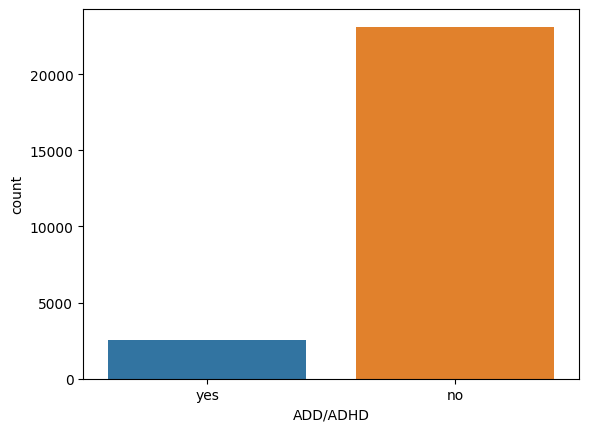

In [57]:
sns.countplot(data=dataframe_v5, x="ADD/ADHD", order=["yes", "no"])

In [58]:
dataframe_v5_no_majority = dataframe_v5[(dataframe_v5['ADD/ADHD']=='no')]
dataframe_v5_yes_minority = dataframe_v5[(dataframe_v5['ADD/ADHD']=='yes')]

In [59]:
# increasing the datapoints of the minority class upto the majority class
# this is called randomly oversampling or upsampling
dataframe_v5_yes_minority_upsampled = resample(dataframe_v5_yes_minority, replace=True, n_samples=23123, random_state=42)
dataframe_v5_balanced = pd.concat([dataframe_v5_yes_minority_upsampled, dataframe_v5_no_majority])
# to shuffle the dataset row order after concatenation
dataframe_v5_balanced = dataframe_v5_balanced.sample(frac=1)

<Axes: xlabel='ADD/ADHD', ylabel='count'>

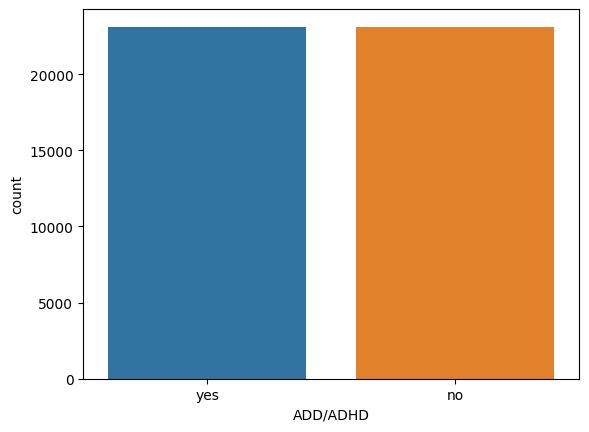

In [60]:
sns.countplot(data=dataframe_v5_balanced, x="ADD/ADHD", order=["yes", "no"])

In [61]:
dataframe_v5_balanced["ADD/ADHD"].value_counts()

yes    23123
no     23123
Name: ADD/ADHD, dtype: int64

In [62]:
dataframe_v5_balanced.to_csv('dataframe_v5_balanced.csv', index=False)
!cp dataframe_v5_balanced.csv root_directory + project_folder

cp: target 'project_folder' is not a directory


# applying different encoder on dataset

In [63]:
dataframe_v6 = pd.read_csv('dataframe_v5_balanced.csv')

label encoding on target column

In [64]:
le = LabelEncoder()
dataframe_v6["ADD/ADHD"] = le.fit_transform(dataframe_v6["ADD/ADHD"])

# demonstration of label encoding
dataframe_v6.iloc[30:37, 18:19]

,ADD/ADHD
30,0
31,0
32,0
33,1
34,0
35,0
36,1


ordinal encoding on mother's education & poverty level

In [65]:
oe = OrdinalEncoder(categories=[['less than high school', 'high school', 'more than high school']])
dataframe_v6["Mother's Education"] = oe.fit_transform(dataframe_v6[["Mother's Education"]])

In [66]:
oe = OrdinalEncoder(categories=[['<200%', '>=200%']])
dataframe_v6["Poverty Level"] = oe.fit_transform(dataframe_v6[["Poverty Level"]])

In [67]:
# demonstration of ordinal encoding
dataframe_v6.iloc[:7, 16:18]

,Mother's Education,Poverty Level
0,2.0,1.0
1,2.0,1.0
2,2.0,1.0
3,2.0,1.0
4,1.0,1.0
5,2.0,1.0
6,2.0,1.0


one hot encoding for nominal valued columns

methods

In [68]:
def get_column_abbr(col):
  col_abbr = ""
  wrd_lst = re.split(" |/", col)
  if len(wrd_lst) == 1:
    col_abbr = wrd_lst[0][:3]
  else:
    for w in wrd_lst:
      col_abbr += w[0]
  
  col_abbr = col_abbr.upper()
  return col_abbr

code flow

In [69]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
dataframe_v6_ohe_trimmed = dataframe_v6.iloc[:, 2:16]
dataframe_v6_ohe_trimmed.head(5)

,Child's Sex,Allergies,Arthritis,Asthma,Brain Injury,Headaches,Anxiety,Depression,Lived with Anyone with Alcohol/Drug Problem,Child's Race,Family Structure,Very Low Birth Weight,Low Birth Weight,Premature Birth
0,male,yes,no,no,no,no,yes,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no
1,female,no,no,no,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no
2,male,no,no,yes,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no
3,female,yes,no,yes,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",no,no,no
4,female,no,no,no,no,no,no,no,no,white,"Two biogical/adoptive parents, currently married",no,yes,yes


In [70]:
cat_cols = ["Child's Sex", "Allergies", "Arthritis", "Asthma", "Brain Injury", "Headaches", "Anxiety", 
            "Depression", "Lived with Anyone with Alcohol/Drug Problem", "Child's Race", 
            "Family Structure", "Very Low Birth Weight", "Low Birth Weight", "Premature Birth"]
encoded_cols = ohe.fit_transform(dataframe_v6[cat_cols])
encoded_cols.shape

(46246, 20)

In [71]:
array_start_index = 0
encoded_col_list = []

for col in cat_cols:
  unique_values = list(dataframe_v6_ohe_trimmed[col].unique())
  unique_values = unique_values[1:]
  abbr = get_column_abbr(col)
  
  # print(abbr, " ", end="")
  for i in range(array_start_index, (array_start_index + len(unique_values))):
    # print(i , " ", end="")
    row_num = 0
    for j in range(40933):
      if encoded_cols[j][i] == 1:
        row_num = j
        break

    val = dataframe_v6_ohe_trimmed.iloc[row_num][col]
    encoded_col_list.append(f"{abbr}_{val}")
  array_start_index = array_start_index + len(unique_values)
  # print()

encoded_col_list

['CS_male',
 'ALL_yes',
 'ART_yes',
 'AST_yes',
 'BI_yes',
 'HEA_yes',
 'ANX_yes',
 'DEP_yes',
 'LWAWADP_yes',
 'CR_others',
 'CR_white',
 'FS_Single father',
 'FS_Single mother',
 'FS_Two biogical/adoptive parents, currently married',
 'FS_Two biogical/adoptive parents, not currently married',
 'FS_Two parents (at least one not biological/adoptive), currently married',
 'FS_Two parents (at least one not biological/adoptive), not currently married',
 'VLBW_yes',
 'LBW_yes',
 'PB_yes']

In [72]:
encoded_cols = ohe.fit_transform(dataframe_v6[cat_cols])
dataframe_v6_ohe_encoded = pd.DataFrame(encoded_cols, columns=encoded_col_list)

dataframe_v6_encoded_first_part = dataframe_v6.iloc[:, :2]
dataframe_v6_encoded_last_part = dataframe_v6.iloc[:, 16:]

dataframe_v6_encoded = pd.concat([dataframe_v6_encoded_first_part, dataframe_v6_ohe_encoded, dataframe_v6_encoded_last_part], axis=1)

dataframe_v6_encoded

,Child's Age (yr),Mother's Age at Child Birth (yr),CS_male,ALL_yes,ART_yes,AST_yes,BI_yes,HEA_yes,ANX_yes,DEP_yes,...,"FS_Two biogical/adoptive parents, currently married","FS_Two biogical/adoptive parents, not currently married","FS_Two parents (at least one not biological/adoptive), currently married","FS_Two parents (at least one not biological/adoptive), not currently married",VLBW_yes,LBW_yes,PB_yes,Mother's Education,Poverty Level,ADD/ADHD
0,11.0,27.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1
1,11.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1
2,12.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1
3,5.0,33.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1
4,16.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46241,5.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
46242,13.0,35.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
46243,8.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
46244,10.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0


In [73]:
dataframe_v6_encoded.to_csv('dataframe_v6_encoded.csv', index=False)
!cp dataframe_v6_encoded.csv root_directory + project_folder

cp: target 'project_folder' is not a directory


# scaling dataset using standardization

In [74]:
dataframe_v7_scaled = pd.read_csv('dataframe_v6_encoded.csv')

In [75]:
# applying standardization only on numerical columns 
# child's age and mother's age
dataframe_v7_scaled[["Child's Age (yr)", "Mother's Age at Child Birth (yr)"]] = StandardScaler().fit_transform(dataframe_v7_scaled[["Child's Age (yr)", "Mother's Age at Child Birth (yr)"]])
dataframe_v7_scaled.iloc[:7, :2]

,Child's Age (yr),Mother's Age at Child Birth (yr)
0,0.038469,-0.518663
1,0.038469,0.328178
2,0.251144,-0.518663
3,-1.237580,0.497546
4,1.101843,0.836282
5,1.314518,-0.518663
6,0.038469,-0.010558


In [76]:
np.round(dataframe_v7_scaled.iloc[:7, :2].describe())

,Child's Age (yr),Mother's Age at Child Birth (yr)
count,7.0,7.0
mean,0.0,0.0
std,1.0,1.0
min,-1.0,-1.0
25%,0.0,-1.0
50%,0.0,-0.0
75%,1.0,0.0
max,1.0,1.0


<Axes: title={'center': 'scaling demonstration'}, xlabel="Child's Age (yr)", ylabel="Mother's Age at Child Birth (yr)">

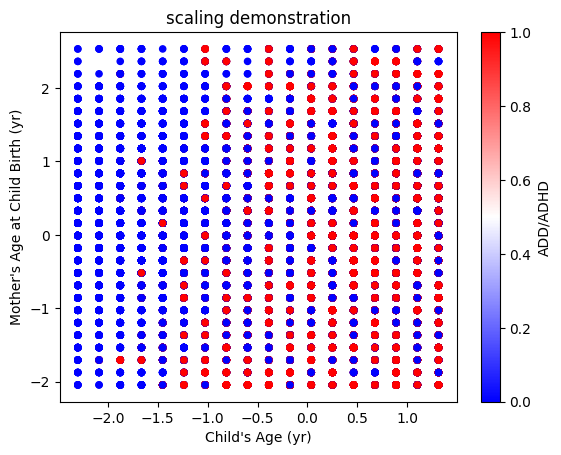

In [77]:
# after standardization, mean of the column values will be zero
dataframe_v7_scaled.plot.scatter(x="Child's Age (yr)", y="Mother's Age at Child Birth (yr)", c="ADD/ADHD",
                                 title= "scaling demonstration",  colormap='bwr')

In [78]:
dataframe_v7_scaled.to_csv('dataframe_v7_scaled.csv', index=False)
!cp dataframe_v7_scaled.csv root_directory + project_folder

cp: target 'project_folder' is not a directory


# applying machine learning models

In [79]:
model_performance = [['NB', 'RF', 'KNN', 'MLP'], []]

In [80]:
dataframe_v6_encoded = pd.read_csv('dataframe_v6_encoded.csv')
dataframe_v7_scaled = pd.read_csv('dataframe_v7_scaled.csv')

In [81]:
dataframe_v6_encoded_X = dataframe_v6_encoded.drop("ADD/ADHD", axis=1)
dataframe_v6_encoded_Y = dataframe_v6_encoded["ADD/ADHD"]

In [82]:
dataframe_v7_scaled_X = dataframe_v7_scaled.drop("ADD/ADHD", axis=1)
dataframe_v7_scaled_Y = dataframe_v7_scaled["ADD/ADHD"]

gloabal methods

In [83]:
def show_scores(confusion_matrix, isChecking):
  cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["no", "yes"])
  
  if isChecking == False:
    cm_display.plot()

  TN = confusion_matrix[0][0]
  TP = confusion_matrix[1][1]
  FN = confusion_matrix[1][0]
  FP = confusion_matrix[0][1]

  accuracy = (TP + TN) / (TP + TN + FP + FN)
  error_rate = (FP + FN) / (TP + TN + FP + FN)
  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)

  p = 6

  return [round(accuracy, p), round(error_rate, p), round(sensitivity, p), round(specificity, p)]

In [84]:
def get_cv(variation, kf):
  if variation == 1:
    return StratifiedKFold(n_splits=kf)
  else:
    return StratifiedKFold(n_splits=kf, random_state=42, shuffle=True)

In [85]:
def get_best_k(model, x, y):
  k_values = list(range(2, 11))
  accuracies = []

  for k_v in k_values:
    y_p = cross_val_predict(model, x, y, cv=get_cv(1, k_v))
    conf_matrix = confusion_matrix(y, y_p)

    info = show_scores(conf_matrix, True)
    accuracies.append(round(info[0], 4))

  best_k_index = accuracies.index(max(accuracies))
  print(k_values[best_k_index], " | ", accuracies)
  return k_values[best_k_index]

# Naive Bayes model

In [86]:
# only encoded dataset has been used
# negative values created by scaling causes problem for naive bayes 

# converting numerical columns to categorical columns using binning
# child's age & mother's age

dataframe_v6_encoded_X_NB = dataframe_v6_encoded_X.copy()
# 0-2 toddler 1
# 3-5 early childhood 2
# 6-11 middle childhood 3
# 12-18 early adolescence 4
dataframe_v6_encoded_X_NB["Child's Age (yr)"] = pd.cut(x=dataframe_v6_encoded_X_NB["Child's Age (yr)"], bins=[-1, 2, 5, 11, 18], 
                                                  labels=[1, 2, 3, 4])

# 13-19 teen 1
# 20-30 adult 2
# 31-50 middle aged 3
dataframe_v6_encoded_X_NB["Mother's Age at Child Birth (yr)"] = pd.cut(x=dataframe_v6_encoded_X_NB["Mother's Age at Child Birth (yr)"], 
                                                                       bins=[12, 19, 30, 50], 
                                                                       labels=[1, 2, 3])


In [87]:
c_nb = CategoricalNB()
k1 = get_best_k(c_nb, dataframe_v6_encoded_X_NB, dataframe_v6_encoded_Y)

4  |  [0.718, 0.7178, 0.7181, 0.718, 0.7178, 0.7179, 0.7179, 0.7177, 0.7179]


accuracy:  0.718116
error rate:  0.281884
sensitivity:  0.674566
specificity:  0.761666



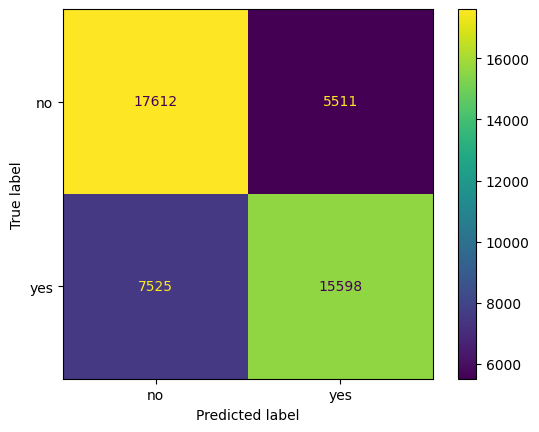

In [88]:
y_pred = cross_val_predict(c_nb, dataframe_v6_encoded_X_NB, dataframe_v6_encoded_Y, cv=get_cv(1, k1))
conf_matrix = confusion_matrix(dataframe_v6_encoded_Y, y_pred)

info = show_scores(conf_matrix, False)
model_performance[1].append(info[0])
print("accuracy: ", info[0])
print("error rate: ", info[1])
print("sensitivity: ", info[2])
print("specificity: ", info[3])
print("")

# Random Forest model

In [89]:
# only encoded dataset has been used
# random forest doesn't require scaling
rf = RandomForestClassifier(n_estimators = 100) 
k2 = get_best_k(rf, dataframe_v6_encoded_X, dataframe_v6_encoded_Y)

10  |  [0.9036, 0.9178, 0.9217, 0.9245, 0.9257, 0.9264, 0.9274, 0.927, 0.9286]


accuracy:  0.928534
error rate:  0.071466
sensitivity:  0.974009
specificity:  0.88306



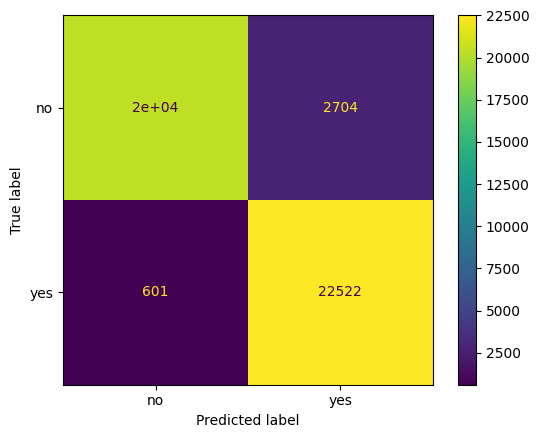

In [90]:
y_pred = cross_val_predict(rf, dataframe_v6_encoded_X, dataframe_v6_encoded_Y, cv=get_cv(1, k2))
conf_matrix = confusion_matrix(dataframe_v6_encoded_Y, y_pred)

info = show_scores(conf_matrix, False)
model_performance[1].append(info[0])
print("accuracy: ", info[0])
print("error rate: ", info[1])
print("sensitivity: ", info[2])
print("specificity: ", info[3])
print("")

# KNN classifier

In [91]:
# KNN performs better on scaled dataset
kn_list = [3, 5, 7]
K_acc_list = [[], []]

for i in kn_list:
  knn = KNeighborsClassifier(n_neighbors = i)
  k3 = get_best_k(knn, dataframe_v7_scaled_X, dataframe_v7_scaled_Y)
  K_acc_list[0].append(k3)

  y_pred = cross_val_predict(knn, dataframe_v7_scaled_X, dataframe_v7_scaled_Y, cv=get_cv(1, k3))
  conf_matrix = confusion_matrix(dataframe_v7_scaled_Y, y_pred)

  info = show_scores(conf_matrix, True)
  K_acc_list[1].append(info[0])

print(kn_list)
print(K_acc_list[0])
print(K_acc_list[1])

indx = K_acc_list[1].index(max(K_acc_list[1]))
k3 = K_acc_list[0][indx]
kn = kn_list[indx]

print(kn)
print(k3)
print(max(K_acc_list[1]))



10  |  [0.851, 0.8729, 0.8767, 0.8813, 0.8846, 0.8854, 0.886, 0.8874, 0.8879]
10  |  [0.8189, 0.8446, 0.8535, 0.8587, 0.862, 0.8634, 0.8645, 0.8652, 0.8667]
10  |  [0.7955, 0.8239, 0.8328, 0.8389, 0.8425, 0.8437, 0.8447, 0.8472, 0.8479]
[3, 5, 7]
[10, 10, 10]
[0.887861, 0.866734, 0.847944]
3
10
0.887861


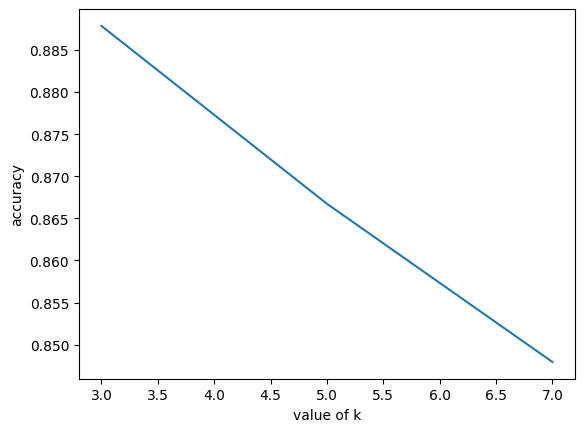

In [92]:
import matplotlib.pyplot as plt
  
plt.plot(kn_list, K_acc_list[1])
plt.xlabel('value of k')
plt.ylabel('accuracy')
plt.show()

accuracy:  0.887861
error rate:  0.112139
sensitivity:  0.954418
specificity:  0.821303



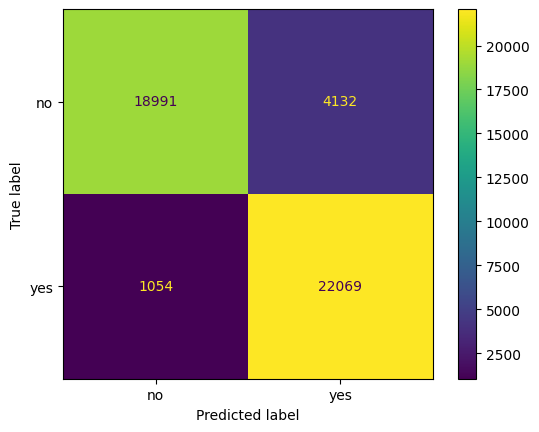

In [93]:
knn = KNeighborsClassifier(n_neighbors = kn)
y_pred = cross_val_predict(knn, dataframe_v7_scaled_X, dataframe_v7_scaled_Y, cv=get_cv(1, k3))
conf_matrix = confusion_matrix(dataframe_v7_scaled_Y, y_pred)

info = show_scores(conf_matrix, False)
model_performance[1].append(info[0])
print("accuracy: ", info[0])
print("error rate: ", info[1])
print("sensitivity: ", info[2])
print("specificity: ", info[3])
print("")

# MLP calssifier

7  |  [0.7907, 0.805, 0.8085, 0.8096, 0.8051, 0.8101, 0.8085, 0.8092, 0.8074]
accuracy:  0.810146
error rate:  0.189854
sensitivity:  0.846992
specificity:  0.773299



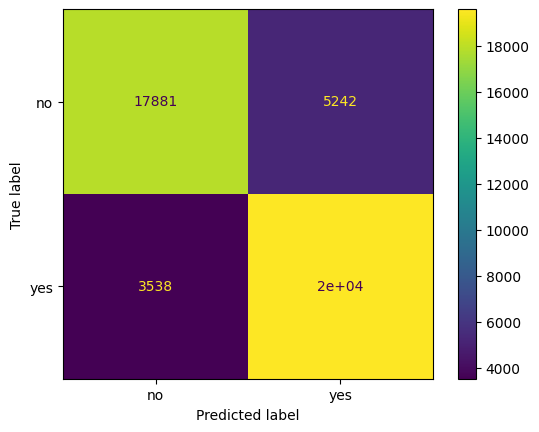

In [94]:
# hidden_layer_sizes = (100, i) (default) (ith element represents the number of neurons in the ith hidden layer)
# random state = 1 (determines random number generation for weights and bias initialization)
# max_iter = 500 (maximum number of iterations. solver iterates until convergence)
# solver = adam (adam refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba)
# activation = relu
# learning rate = 0.01
# early stopping = True (terminate training when validation score is not improving. 10% of training data set as validation)
mlp = MLPClassifier(random_state=1, max_iter=500, solver ='adam', activation='relu', learning_rate_init=0.01, early_stopping=True)

k4 = get_best_k(mlp, dataframe_v7_scaled_X, dataframe_v7_scaled_Y)

y_pred = cross_val_predict(mlp, dataframe_v7_scaled_X, dataframe_v7_scaled_Y, cv=get_cv(1, k4))
conf_matrix = confusion_matrix(dataframe_v7_scaled_Y, y_pred)

info = show_scores(conf_matrix, False)
model_performance[1].append(info[0])
print("accuracy: ", info[0])
print("error rate: ", info[1])
print("sensitivity: ", info[2])
print("specificity: ", info[3])
print("")


# model evaluation

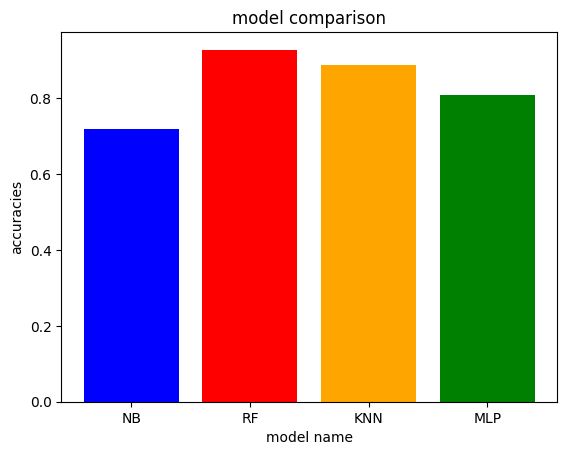

In [95]:
x_axis = model_performance[0]
y_axis = model_performance[1]
c = ['blue', 'red', 'orange', 'green']
plt.bar(x_axis, y_axis, color=c)
plt.title('model comparison')
plt.xlabel('model name')
plt.ylabel('accuracies')
plt.show()

# performing t-test on Random Forest & KNN classifiers

In [96]:
dataframe_v6_encoded_X_test = dataframe_v6_encoded_X.copy()
dataframe_v6_encoded_Y_test = dataframe_v6_encoded_Y.copy()

dataframe_v7_scaled_X_test = dataframe_v7_scaled_X.copy()
dataframe_v7_scaled_Y_test = dataframe_v7_scaled_Y.copy()

In [97]:
rf_t = RandomForestClassifier(n_estimators = 100) 
knn_t = KNeighborsClassifier(n_neighbors = 3)
kf_t = 10


In [98]:
error_rate_rf = []
error_rate_knn = []

for i in range(kf_t):
  scores_rf = cross_val_score(rf_t, dataframe_v6_encoded_X_test, dataframe_v6_encoded_Y_test, scoring='neg_mean_absolute_error', cv=get_cv(1, kf_t))
  error_rf = mean(absolute(scores_rf))
  error_rate_rf.append(round(error_rf, 6))

  scores_knn = cross_val_score(knn_t, dataframe_v7_scaled_X_test, dataframe_v7_scaled_Y_test, scoring='neg_mean_absolute_error',
                               cv=get_cv(1, kf_t))
  error_knn = mean(absolute(scores_knn))
  error_rate_knn.append(round(error_knn, 6))

  # shuffling the datasets after each iteration
  idx = np.random.permutation(dataframe_v6_encoded_X_test.index)
  dataframe_v6_encoded_X_test = dataframe_v6_encoded_X_test.reindex(idx)
  dataframe_v6_encoded_Y_test = dataframe_v6_encoded_Y_test.reindex(idx)

  dataframe_v6_encoded_scaled_X_test = dataframe_v7_scaled_X_test.reindex(idx)
  dataframe_v6_encoded_scaled_Y_test = dataframe_v7_scaled_Y_test.reindex(idx)


In [99]:
print(error_rate_rf)
print(error_rate_knn)

[0.071185, 0.07179, 0.071985, 0.072006, 0.07259, 0.071682, 0.071876, 0.070968, 0.072136, 0.07086]
[0.11214, 0.11214, 0.11214, 0.11214, 0.11214, 0.11214, 0.11214, 0.11214, 0.11214, 0.11214]


In [100]:
mean_error_rate_rf = round(mean(error_rate_rf), 6)
mean_error_rate_knn = round(mean(error_rate_knn), 6)

In [101]:
print(mean_error_rate_rf)
print(mean_error_rate_knn)

0.071708
0.11214


In [102]:
var_lst = []
for i in range(kf_t):
  value = (error_rate_rf[i] - error_rate_knn[i] - (mean_error_rate_rf - mean_error_rate_knn))**2
  var_lst.append(value)

variance = sum(var_lst) / kf_t
t_value = (mean_error_rate_rf - mean_error_rate_knn) / sqrt(variance / kf_t)

In [103]:
degrees_of_freedom = kf_t - 1
significance_level = 0.05
# for 2 tailed t test
t_critical_value = stats.t.ppf(q=1-.05/2, df=degrees_of_freedom)

In [104]:
print("t value ", t_value)
print("significance level ", significance_level)
print("degrees_of_freedom ", degrees_of_freedom)
print("t critical (z) ", t_critical_value)

t value  -245.94756883581786
significance level  0.05
degrees_of_freedom  9
t critical (z)  2.2621571627409915


In [105]:
# decision making 
null_hypothesis = True

# if t is positive then null hypothesis is false if t > t_critical
# if t is negative then null hypothesis is false if t < -t_critical
if (t_value >= 0):
  if t_value > t_critical_value:
    null_hypothesis = False
else:
  t_critical_value = t_critical_value * -1
  if t_value < t_critical_value:
    null_hypothesis = False

if null_hypothesis == True:
  print("Null Hypothesis is True: no significant difference between the Random Forest & KNN models")
else:
  if mean_error_rate_rf <= mean_error_rate_knn:
    print("Null Hypothesis is False: Random Forest model is better")
  else:
    print("Null Hypothesis is False: KNN model is better")

Null Hypothesis is False: Random Forest model is better
